# Simple approach

In order to have a sense on how the dataset works altogether, I will make a first simple linear regression model and check on the different results ($R^2$, MSE, RMSE). I will perform this separating the data in test and train chunks, comparing the results with each of the groups.

In [1]:
from simple_linear_reg import linear_model_tt, lr_results
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diamonds = pd.read_csv('data/train_cate.csv')
diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.50,5,7,4,62.3,55.0,5.11,5.07,3.17,1845
1,1,1.54,2,2,5,63.6,60.0,7.30,7.33,4.65,10164
2,2,1.32,3,1,2,61.7,60.0,6.95,7.01,4.31,5513
3,3,1.20,5,2,3,62.1,55.0,6.83,6.79,4.23,5174
4,4,1.73,4,2,3,61.2,60.0,7.67,7.65,4.69,10957


### Simple Linear Regression

In [5]:
X = diamonds.iloc[:,1:-1]
y = diamonds.price

In [7]:
y_train, y_test, y_train_pred, y_test_pred = linear_model_tt(X, y, 0.2)

lr_results(y_train, y_test, y_train_pred, y_test_pred)

,train_set,test_set
r2,0.907918,0.906416
mae,808.476253,802.232306
rmse,1216.842433,1226.031195


As we can see, our model performs quite good, with a great $R^2$ and an accepatble RMSE, altough is still far from being below 1000. Let's try now to see a correlation heatmap, in order to check if there is some collinearity among the predictor features.

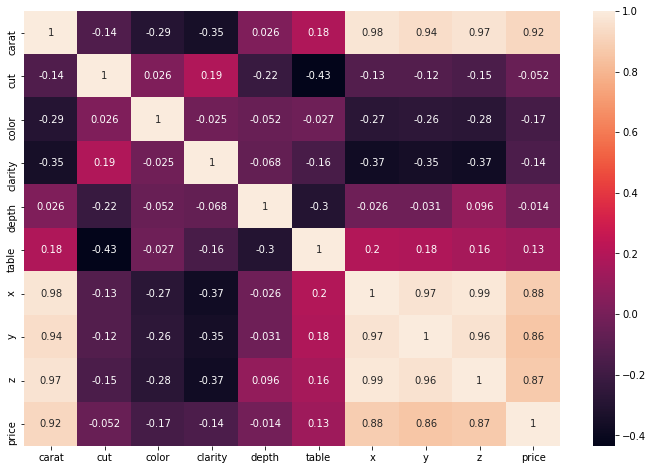

In [8]:
diamonds_corr = diamonds.iloc[:,1:].corr()

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(diamonds_corr, annot=True, ax=ax)
plt.show()

As the heatmap shows, there are some highly correlated columns like 'carat' or the group of the final columns 'x', 'y', and 'z'. They are also highly correlated with 'price', so if we want to remove them we have to be cautious. 

This columns confront, basically, weight ('carat') against size (as x = length, y=  width and z = depth). Let's compare what happens whenever we take out one or the other from our dataset and perform a linear regression.

### Size out

In [9]:
X = diamonds.iloc[:,1:7]

In [10]:
y_train, y_test, y_train_pred, y_test_pred = linear_model_tt(X, y, 0.2)

lr_results(y_train, y_test, y_train_pred, y_test_pred)

,train_set,test_set
r2,0.906571,0.898016
mae,855.503844,872.749806
rmse,1224.980271,1282.942355


### Weight out

In [11]:
X = diamonds.iloc[:,2:-1]

In [12]:
y_train, y_test, y_train_pred, y_test_pred = linear_model_tt(X, y, 0.2)

lr_results(y_train, y_test, y_train_pred, y_test_pred)

,train_set,test_set
r2,0.834315,0.831371
mae,1224.390221,1253.389495
rmse,1629.148081,1658.278410


### Size and Weight out

In [13]:
X = diamonds.iloc[:,2:7]

In [14]:
y_train, y_test, y_train_pred, y_test_pred = linear_model_tt(X, y, 0.2)

lr_results(y_train, y_test, y_train_pred, y_test_pred)

,train_set,test_set
r2,0.064366,0.057563
mae,2859.058317,2906.907103
rmse,3868.485684,3931.402593


### Size and weight

In [15]:
X = diamonds.iloc[:,[1,7,8,9]]

In [16]:
y_train, y_test, y_train_pred, y_test_pred = linear_model_tt(X, y, 0.2)

lr_results(y_train, y_test, y_train_pred, y_test_pred)

,train_set,test_set
r2,0.856246,0.849203
mae,899.499702,897.049252
rmse,1521.938008,1549.939586


After performing the same linear regression model of these three variances of the dataset, using the same train/test division for each of them, we can see a small improvement on the results when the three columns that correspond to the size ('x', 'y' and 'z') are taken out of consideration. Anyway, this improvement is far from our goal. 

Let's try now to perform an OLS test to see which variables are statistically significant and which ones are not.

In [47]:
from statsmodels import api

X = api.add_constant(diamonds.iloc[:,1:-1])

result = api.OLS(y, X).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 4.416e+04
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:36:12   Log-Likelihood:            -3.4485e+05
No. Observations:               40455   AIC:                         6.897e+05
Df Residuals:                   40445   BIC:                         6.898e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2782.8978    546.163      5.095      0.000    1712.406    3853.390
carat       1.085e+04     60.292    179.877      0.000    1.07e+04     1.1e+04
cut          120.8064      6.610     18.276      0.000     107.850     133.763
color        325.2414      3.773     86.198      0.000     317.846     332.637
clarity      503.6992      4.087    123.257      0.000     495.689     511.709
depth        -76.5157      6.688    -11.441      0.000     -89.624     -63.407
table        -28.4147      3.404     -8.347      0.000     -35.087     -21.742
x           -849.1356     51.960    -16.342      0.000    -950.978    -747.293
y             40.2196     21.625      1.860      0.063      -2.166      82.605
z           -127.7329     75.551     -1.691      0.091    -275.815      20.349
==============================================================================
Omnibus:                     9310.342   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           488054.528
Skew:                          -0.143   Prob(JB):                         0.00
Kurtosis:                      20.013   Cond. No.                     7.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By this test, we can see there are two features, 'y' and 'z', which p-values are higher than 0.05 and 0 on its confidence intervals. This means that both of them are not statistically significant for our model. Let's try to perform a linear regression again, this time whitout those two features.

In [48]:
X = diamonds.iloc[:,1:-3]

In [60]:
y_train, y_test, y_train_pred, y_test_pred = linear_model_tt(X, y, 0.2)

lr_results(y_train, y_test, y_train_pred, y_test_pred)

,train_set,test_set
r2,0.906821,0.910767
mae,809.325824,797.564958
rmse,1223.703650,1198.534325


For this approach, it seems like the model gives better results whenever we take out the columns relative to the size of the diamond, rather than the column relative to the weight. 